<a href="https://colab.research.google.com/github/Nuradilisayev/NIT/blob/master/HW_08_07_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [36]:
pm=pd.read_csv('/content/pm_data.csv')

In [37]:
pm.head()

,Unnamed: 0,id,sensorid,recdate,pm10,pm25,temp,co2
0,0,1745636,2001,2018-11-20 00:00:09,189,158,0,0
1,1,1745637,2002,2018-11-20 00:00:09,151,137,0,0
2,2,1745638,2004,2018-11-20 00:00:09,30,28,0,0
3,3,1745643,2005,2018-11-20 00:00:10,784,639,0,0
4,4,1745645,2003,2018-11-20 00:00:11,131,117,0,0


In [38]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41886 entries, 0 to 41885
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  41886 non-null  int64 
 1   id          41886 non-null  int64 
 2   sensorid    41886 non-null  int64 
 3   recdate     41886 non-null  object
 4   pm10        41886 non-null  int64 
 5   pm25        41886 non-null  int64 
 6   temp        41886 non-null  int64 
 7   co2         41886 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.6+ MB


In [39]:
pm= pm[['sensorid', 'recdate', 'pm25']]

In [40]:
pm.head(3)

,sensorid,recdate,pm25
0,2001,2018-11-20 00:00:09,158
1,2002,2018-11-20 00:00:09,137
2,2004,2018-11-20 00:00:09,28


In [41]:
pm=pm.rename(columns={'sensorid':'sensorname','recdate':'date'})

In [42]:
pm_dist = pm['sensorname'].value_counts().to_frame()

In [43]:
pm_dist

,sensorname
2001,7154
2006,7153
2002,7113
2004,7101
2003,6811
2005,3927
2008,2627


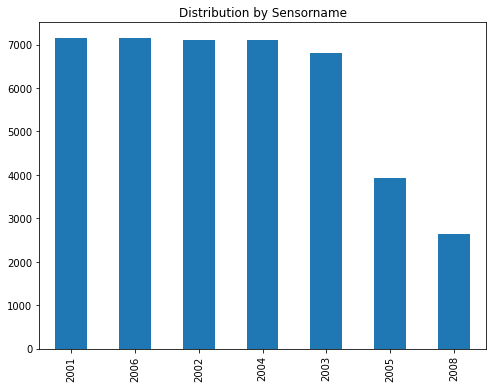

In [44]:
pm_dist['sensorname'].plot.bar(figsize=(8, 6), title='Distribution by Sensorname')

Z_score

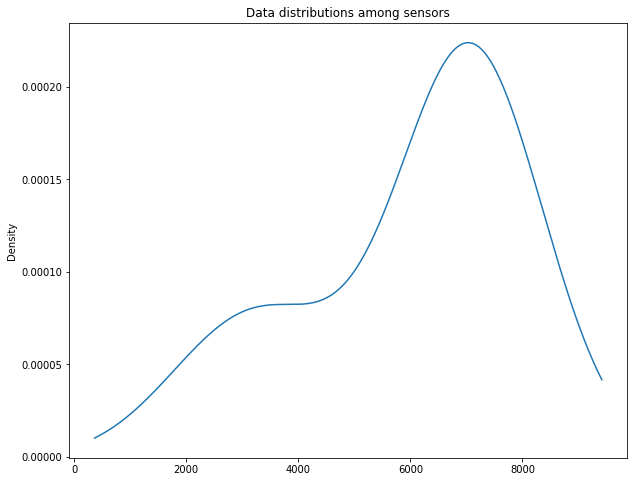

In [45]:
pm_dist['sensorname'].plot.kde(title='Data distributions among sensors', 
                                        figsize=(10, 8))

In [46]:
pm_dist['z_score'] = (pm_dist['sensorname'] - pm_dist['sensorname'].mean())/pm_dist['sensorname'].std()

In [47]:
pm_dist

,sensorname,z_score
2001,7154,0.619057
2006,7153,0.618528
2002,7113,0.597369
2004,7101,0.591021
2003,6811,0.437617
2005,3927,-1.087959
2008,2627,-1.775633


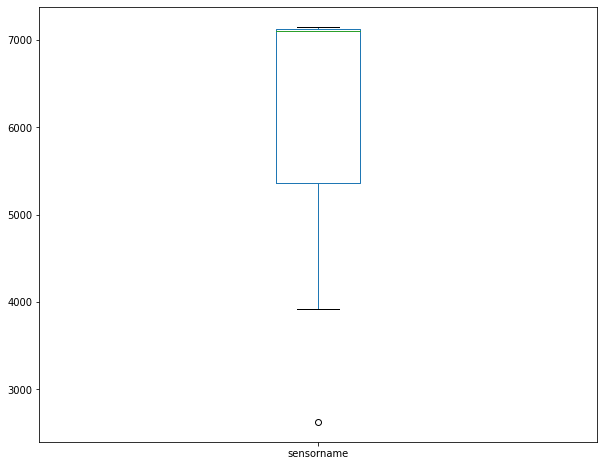

In [49]:
pm_dist['sensorname'].plot.box(figsize=(10, 8))

In [82]:
def without_outliers(df):
    #
    return df[np.abs(df['z_score']) < 0.6]

In [83]:
without_outliers=without_outliers(pm_dist)

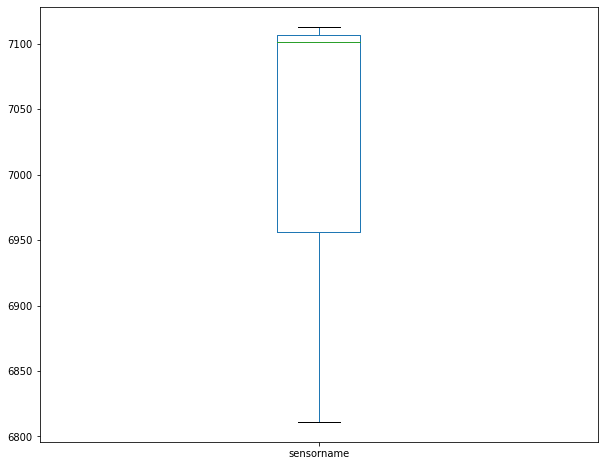

In [84]:
without_outliers['sensorname'].plot.box(figsize=(10,8))